In [ ]:
!nvidia-smi

Fri Mar  8 10:12:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#Install Ultralytics

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.5/719.5 kB 5.3 MB/s eta 0:00:00


#Importing some libraries

In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.4/201.2 GB disk)


#Checking working directory

In [ ]:
!pwd

/content


# importing important libraries

In [ ]:
import os
import shutil
import random

#Importing Yolo

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

#Custom Training
#Mount Hard drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#GPU check

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.4/201.2 GB disk)


#Training Use Yolov8= yolov8x.pt

In [ ]:
!yolo task=detect mode=train data=/content/drive/MyDrive/Yolov8Crime_detection/data.yaml model=yolov8x.pt epochs=100 imgsz =640 batch=8 project=/content/drive/MyDrive/Yolov8Crime_detection/runs name=crime_detection

100% 131M/131M [00:01<00:00, 71.4MB/s]
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/drive/MyDrive/Yolov8Crime_detection/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Yolov8Crime_detection/runs, name=crime_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

In [ ]:
!ls /content/drive/MyDrive/Yolov8Crime_detection/runs

crime_detection


#Plotting confusion_matrix 2




In [15]:
Image(filename='/content/drive/MyDrive/Yolov8Crime_detection/runs/crime_detection/confusion_matrix.png', width=600)

# Plotting confusion_matrix normalized

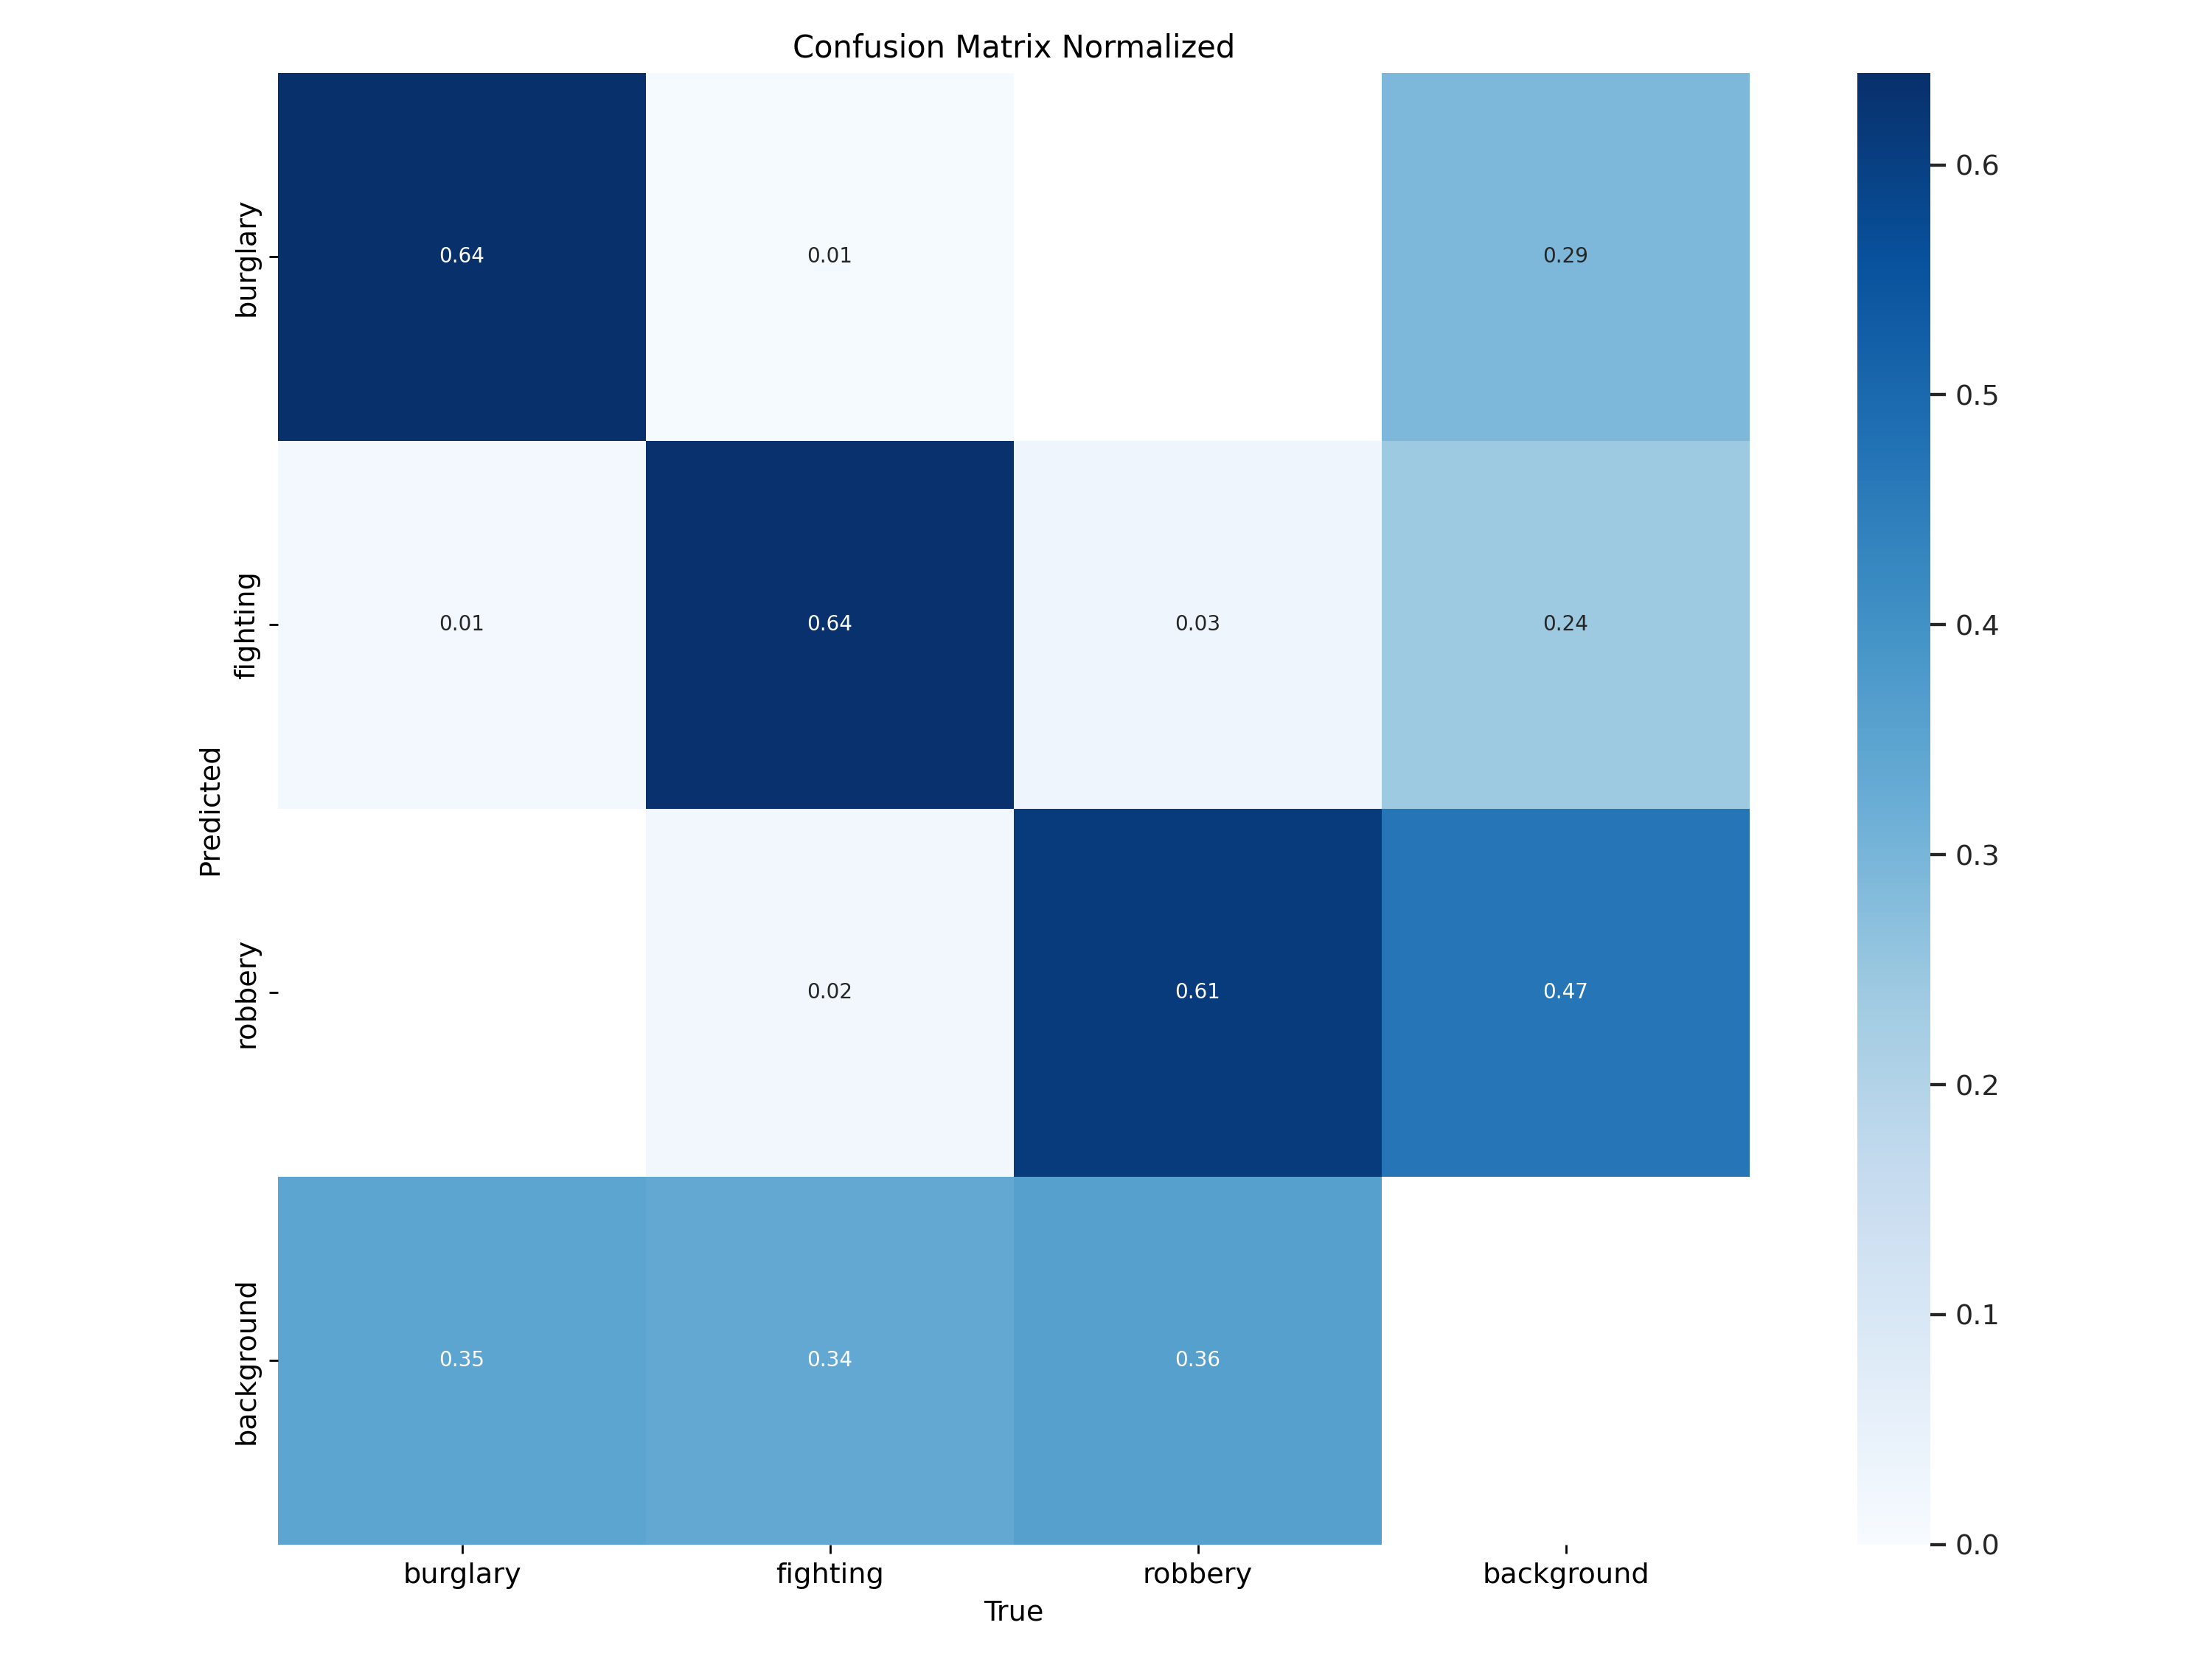

In [16]:
Image(filename='/content/drive/MyDrive/Yolov8Crime_detection/runs/crime_detection/confusion_matrix_normalized.png', width=600)

# Validate Custom Model

In [17]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Yolov8Crime_detection/runs/crime_detection/weights/best.pt data='/content/drive/MyDrive/Yolov8Crime_detection/data.yaml'

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/drive/MyDrive/Yolov8Crime_detection/valid/labels.cache... 325 images, 29 backgrounds, 0 corrupt: 100% 325/325 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 59, len(boxes) = 473. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 21/21 [00:10<00:00,  2.03it/s]
                   all        325        473      0.658      0.551      0.584      0.351
              burglary        325        150      0.653      0.565      0.578      0.322
              fighting        325        146      0.696      0.562      0.647       0.38
     

#Inference with Custom Model: For Images

/content/drive/MyDrive/Yolov8Crime_detection/runs/crime_detection/weights/best.pt

In [18]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Yolov8Crime_detection/runs/crime_detection/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Yolov8Crime_detection/test/images

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs

image 1/163 /content/drive/MyDrive/Yolov8Crime_detection/test/images/ROb10_0056_jpg.rf.3bd577f78c16cd5a2e725a5f0448792a.jpg: 640x640 4 robberys, 21.7ms
image 2/163 /content/drive/MyDrive/Yolov8Crime_detection/test/images/ROb10_0062_jpg.rf.b81a1eacf966505f73ac040122e1f236.jpg: 640x640 4 robberys, 21.8ms
image 3/163 /content/drive/MyDrive/Yolov8Crime_detection/test/images/ROb10_0078_jpg.rf.e1d287c56124e92caa0a917173e449cd.jpg: 640x640 8 robberys, 21.7ms
image 4/163 /content/drive/MyDrive/Yolov8Crime_detection/test/images/ROb10_0081_jpg.rf.d7941fde66a139c0a70966acd004ed5c.jpg: 640x640 7 robberys, 21.9ms
image 5/163 /content/drive/MyDrive/Yolov8Crime_detection/test/images/ROb12_0019_jpg.rf.d2ad9770c54807fc1a40206d25f8ce9c.jpg: 640x640 4 robberys, 21.7ms
image 6/163 /content/drive/MyDrive/Yolov8Crime_detection/t

#For Video detections

In [19]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Yolov8Crime_detection/runs/crime_detection/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Yolov8Crime_detection/test_vid1

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs

video 1/6 (1/180) /content/drive/MyDrive/Yolov8Crime_detection/test_vid1/V_14.mp4: 416x640 1 fighting, 106.8ms
video 1/6 (2/180) /content/drive/MyDrive/Yolov8Crime_detection/test_vid1/V_14.mp4: 416x640 1 fighting, 17.8ms
video 1/6 (3/180) /content/drive/MyDrive/Yolov8Crime_detection/test_vid1/V_14.mp4: 416x640 4 fightings, 17.6ms
video 1/6 (4/180) /content/drive/MyDrive/Yolov8Crime_detection/test_vid1/V_14.mp4: 416x640 1 fighting, 17.7ms
video 1/6 (5/180) /content/drive/MyDrive/Yolov8Crime_detection/test_vid1/V_14.mp4: 416x640 3 fightings, 17.7ms
video 1/6 (6/180) /content/drive/MyDrive/Yolov8Crime_detection/test_vid1/V_14.mp4: 416x640 2 fightings, 17.6ms
video 1/6 (7/180) /content/drive/MyDrive/Yolov8Crime_detection/test_vid1/V_14.mp4: 416x640 2 fightings, 17.6ms
video 1/6 (8/180) /content/drive/MyDrive/Yo

In [20]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Yolov8Crime_detection/runs/crime_detection/weights/best.pt

WARNING ⚠️ 'source' is missing. Using default 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 1 fighting, 2 robberys, 110.4ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 1 fighting, 114.3ms
Speed: 3.4ms preprocess, 112.3ms inference, 291.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


#Note: Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

from image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")